# MNIST character recognization - boiler plate code
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

### This boiler plate code aims to give step-by-step instructions and illustration for building a simple 2-layer densely-connected neural network for MNIST image recognition.

## Import libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import MNIST data from TensorFlow examples module and examine

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False) # One-hot-encoding is set True

Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz


### One-hot encoding
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In the case of MNIST data, one-hot encoding turns a categorial variable like 3 to a vector [0 0 0 1 0 0 0 0 0 0 0] i.e. the 4th position of the 10-element vector is 1 and the rest is 0. The 10 positions of the array denotes 0 to 9, and so a 1 in the 4th position means this array represents 3.

Here is the idea,

![](1-hot-encoding.png)

In [3]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

** Shape and size **

In [4]:
print ("Shape of the MNIST training data:",mnist.train.images.shape)
print ("Size of the MNIST training data:",mnist.train.images.size)

Shape of the MNIST training data: (55000, 28, 28, 1)
Size of the MNIST training data: 43120000


In [5]:
print ("Number of training examples:", mnist.train.num_examples)
print ("Number of test examples:", mnist.test.num_examples)
print ("Number of validation examples:", mnist.validation.num_examples)

Number of training examples: 55000
Number of test examples: 10000
Number of validation examples: 5000


## We need to flatten the image data in a vector, re-extract with _'reshape'_ True

Here is the idea,

![](flatten-array.png)

In [6]:
mnist = input_data.read_data_sets(".", one_hot=True, reshape=True)

Extracting .\train-images-idx3-ubyte.gz
Extracting .\train-labels-idx1-ubyte.gz
Extracting .\t10k-images-idx3-ubyte.gz
Extracting .\t10k-labels-idx1-ubyte.gz


** Now print the shape of the data and observe the difference in dimension from before **

In [7]:
print ("Shape of the MNIST training data:",mnist.train.images.shape)
print ("Size of the MNIST training data:",mnist.train.images.size)

Shape of the MNIST training data: (55000, 784)
Size of the MNIST training data: 43120000


## Visualizing the data

In [8]:
mnist.train.images[1].shape # Examine the shape of one image data

(784,)

** We flattened the vector. However, to plot the image, we need to reshape it to 28 x 28 pixels **

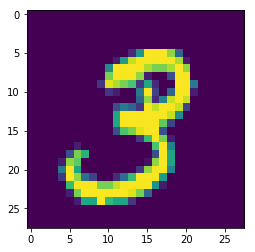

In [9]:
plt.imshow(mnist.train.images[1].reshape(28,28))

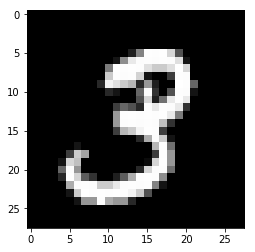

In [10]:
plt.imshow(mnist.train.images[1].reshape(28,28),cmap='gist_gray')

** Show the finite numbers in the data vector **

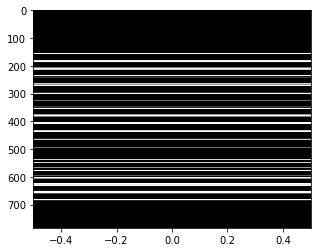

In [11]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.001)

** Show a histogram of one image data vector. Most of the data is zero-valued **

(array([ 612.,    0.,    1.,    7.,    4.,    1.,    3.,    3.,    5.,
           3.,    1.,    2.,    4.,    0.,    0.,    0.,    5.,    0.,
           2.,    0.,    4.,    2.,    1.,    0.,    2.,    2.,    0.,
           2.,    0.,   10.,    0.,    1.,    0.,    4.,    0.,    3.,
           0.,    2.,    0.,   11.,    0.,    8.,    0.,    4.,    0.,
           7.,    0.,    3.,    0.,   65.]),
 array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
         0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
         0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
         0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
         0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
         0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ]),
 <a list of 50 Patch objects>)

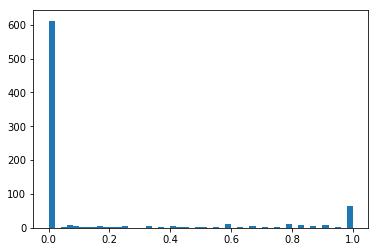

In [12]:
plt.hist(mnist.train.images[1],bins=50)

## Basic statistics about image data
### Data is already normalized

In [13]:
print ("Min value of the image vector", mnist.train.images[1].min())
print ("Max value of the image vector", mnist.train.images[1].max())
print ("Mean value of the image vector", mnist.train.images[1].mean())
print ("Standard deviation value of the image vector", mnist.train.images[1].std())

Min value of the image vector 0.0
Max value of the image vector 1.0
Mean value of the image vector 0.151681
Standard deviation value of the image vector 0.325514


### How dees the Ground Truth i.e. label vector look like? Remember we extracted with 1-hot encoding

In [14]:
mnist.train.labels[1]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

### Is there any correlation between image labels and the basic statistics of that vector e.g. mean or std. dev?

In [15]:
# Create list of mean, std. dev, and labels of the training image vectors for plotting
# Note, argmax function helps extracting the exact digit label from the one-hot encoded label vector
lmean=[]
lstd=[]
llabel=[]
for i in range (55000):
    lmean.append(mnist.train.images[i].mean())
    lstd.append(mnist.train.images[i].std())
    llabel.append(np.argmax(mnist.train.labels[i]))

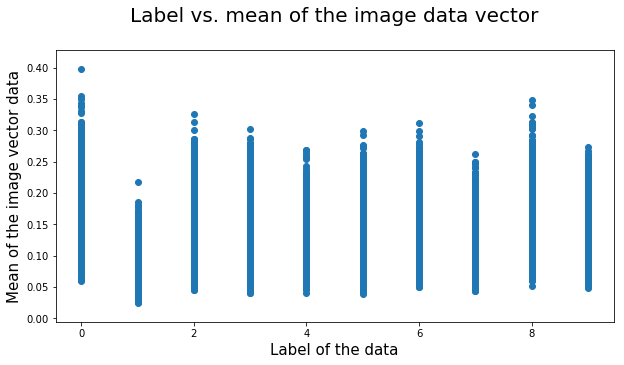

In [16]:
plt.figure(figsize=(10,5))
plt.title ("Label vs. mean of the image data vector\n", fontsize=20)
plt.xlabel("Label of the data",fontsize=15)
plt.ylabel("Mean of the image vector data",fontsize=15)
plt.scatter(llabel,lmean)

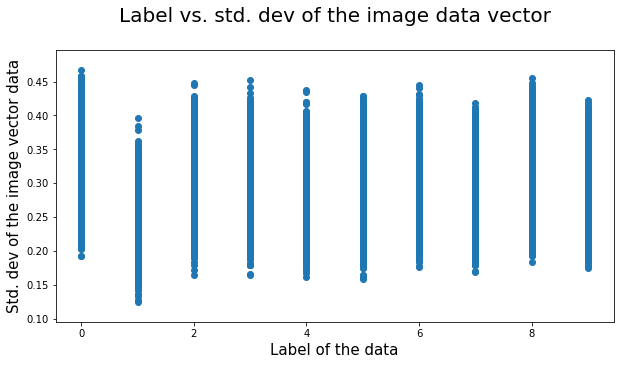

In [17]:
plt.figure(figsize=(10,5))
plt.title ("Label vs. std. dev of the image data vector\n", fontsize=20)
plt.xlabel("Label of the data",fontsize=15)
plt.ylabel("Std. dev of the image vector data",fontsize=15)
plt.scatter(llabel,lstd)

### Conclusion is, there is no apparent correlation between the basic statistics and the label for an image vector data. That means we need to perform advanced machine learning task to classify the images :)

## Parameters and global variables
The variable n_hidden_layer determines the size of the hidden layer in the neural network. This is also known as the width of a layer.

In [18]:
learning_rate = 0.005
training_epochs = 15
batch_size = 128  # Decrease batch size if you don't have enough memory

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 800 # layer number of features

## Declare weights and bias terms (as _tf.Variables_)
Deep neural networks use multiple layers with each layer requiring it's own weight and bias. The 'hidden_layer' weight and bias is for the hidden layer. The 'out' weight and bias is for the output layer. If the neural network were deeper, there would be weights and biases for each additional layer.

In [19]:
# Store layers weight & bias as Variables classes in dictionaries
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### Show the shapes of the various tensors

In [20]:
print("Shape of the weights tensor of hidden layer:",weights['hidden_layer'].shape)
print("Shape of the weights tensor of output layer:",weights['out'].shape)
print("--------------------------------------------------------")
print("Shape of the bias tensor of hidden layer:",biases['hidden_layer'].shape)
print("Shape of the bias tensor of output layer:",biases['out'].shape)

Shape of the weights tensor of hidden layer: (784, 800)
Shape of the weights tensor of output layer: (800, 10)
--------------------------------------------------------
Shape of the bias tensor of hidden layer: (800,)
Shape of the bias tensor of output layer: (10,)


### Create a quick session to show the randomly initialized weight and bias tensor

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    w=sess.run(weights['hidden_layer'])
    b=sess.run(biases['hidden_layer'])
print("Weight tensor initialized randomly\n---------------------------------------\n",w)
print("Bias tensor initialized randomly\n---------------------------------------\n",b)
sess.close()

Weight tensor initialized randomly
---------------------------------------
 [[ 0.53505898  0.3013415  -1.66424465 ...,  2.32469654  0.01067452
  -0.64363921]
 [-1.61862516 -1.55546522  0.03310269 ...,  0.71143669 -1.06901479
   0.05450742]
 [-1.97802305 -0.0238385  -0.96578491 ...,  2.60964561  1.4049238
   0.96460432]
 ..., 
 [ 1.38160992  0.17385226  0.40093505 ...,  0.45988676  0.4926396
   0.07618424]
 [-0.15202108  0.39816052 -0.48986995 ...,  2.20857644 -1.20472229
   1.18510509]
 [ 0.02613966  0.6925332  -1.45667529 ...,  1.47910905 -0.0421916
  -0.10557542]]
Bias tensor initialized randomly
---------------------------------------
 [ -5.25806606e-01   2.39528346e+00   1.17911828e+00   6.42177105e-01
   8.63229215e-01   9.23478127e-01  -8.74100566e-01   7.91483104e-01
   7.38589883e-01  -4.32973951e-01  -1.44309783e+00   8.02062750e-01
   7.49582887e-01   2.78104544e-01   1.53552973e+00  -6.17353857e-01
   1.25457788e+00  -1.43119144e+00   1.55802917e+00   1.49437189e+00
  -9.381

## Input data (as _tf.placeholder_)

In [22]:
# tf Graph input
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("float", [None, n_classes])

## Multi-layer perceptron

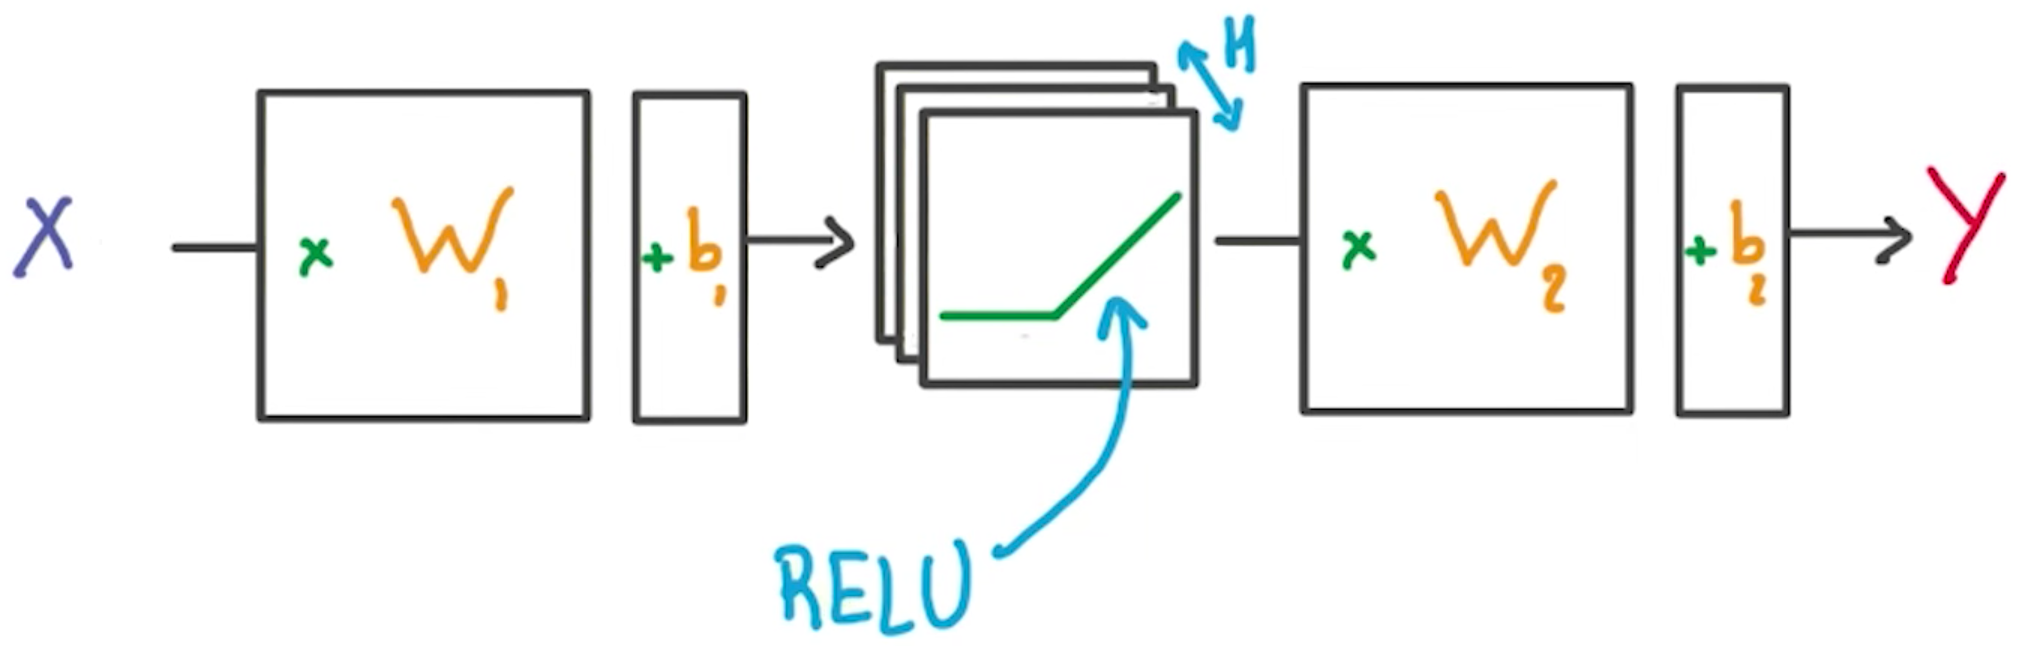

In [23]:
from IPython.display import Image
Image(filename='multi-layer.png')

## Hidden and output layers definition (using TensorFlow mathematical functions)

In [24]:
# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x, weights['hidden_layer']),biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)

# Output layer with linear activation
logits = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

## Cost function and Optimizer (using TensorFlow cost and optimizer objects)

### Softmax activation for the output:
We are using the softmax function, or normalized exponential function, for the output prediction. It is a generalization of the logistic function that "squashes" a K-dimensional vector z of arbitrary real values to a K-dimensional vector σ(__z__) of real values in the range [0, 1] that add up to 1. The function is given by:

$${\displaystyle \sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}}$$

### Cross-entropy loss function:
We are using cross-entropy loss as cost function. It is given by the following formula,

$${\displaystyle H(p,q)\ =\ -\sum _{i}p_{i}\log q_{i}\ =\ -y\log {\hat {y}}-(1-y)\log(1-{\hat {y}})}$$

where ${\hat{y}}$ is the predicted output and ${y}$ is the ground truth label.

### Gradient descent optimizer for training (backpropagation):
For the training of the neural network we need to perform __backpropagation__ i.e. propagate the errors, calculated by this cost function, backwards through the layers all the way up to the input weights and bias in order to adjust them accordingly (minimize the error). This involves taking first-order derivatives of the activation functions and applying chain-rule to ___'multiply'___ the effect of various layers as the error propagates back.

You can read more on this here: [Backpropagation in Neural Network](https://en.wikipedia.org/wiki/Backpropagation)

Fortunately, TensorFlow already implicitly implements this step i.e. takes care of all the chained differentiations for us. All we need to do is to specify an Optimizer object and pass on the cost function. Here, we are using a Gradient Descent Optimizer.

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point.

You can read more on this: [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

In [25]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

### At this point, the computation graph looks like following...

![](Computation-graph-1.png)

## Define Test and accuracy
We can check the correctness of the predicted output by applying the computation graph on to a test set (we will do that during the training of the network to show how the accuracy of the prediction improves over each training epoch).

To test correctness we just need to compare the output (after softmax activation) to the ground truth. This is accomplished by the first line of the code below.

However, to calculate the overall accuracy, we need to know the percentage of the correct predictions out of all predictions. Because the ___correct_prediction___ is just an array of Boolean values, we can simply typecast it to floating point numbers (1.0 and 0.0) and take the average. The number of 1's as a percentage of total count will be the average and also the desired accuracy. This is accomplished by the 2nd line of code below.

** Note, at this point, these are just more formula added to the computational graph. You still have to run them within a session to actually compute the values **

In [26]:
# Compute prediction and calculate overall accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Model saver

In [27]:
# The file path to save the data
save_file = './model.ckpt'

# Class used to save and/or restore Tensor Variables
saver = tf.train.Saver()

## TensorFlow Session for training and loss estimation
The MNIST library in TensorFlow provides the ability to receive the dataset in batches. Calling the  *** mnist.train.next_batch() function *** returns a subset of the training data. 

In [28]:
# Initializing the variables
init = tf.global_variables_initializer()

# Empty lists for book-keeping purpose
epoch=0
loss_batch = []
log_epoch = []
epoch_count=[]
acc=[]

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # Get the first batch. Tuple unpacking from the next_batch output
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    # Initial loss/cost
    _,l1=sess.run([optimizer,cost], feed_dict={x: batch_x, y: batch_y})
    if (epoch==0):
               print ("Initial loss:",l1)
    
    # Loop over epochs
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size) #Tuple unpacking from the next_batch output
            # Run optimization process (backprop) and cost function (to get loss value)
            _,l=sess.run([optimizer,cost], feed_dict={x: batch_x, y: batch_y})
            loss_batch.append(l) # Save the loss for every batch
        
        epoch_count.append(epoch+1) #Save the epoch count
        log_epoch.append(len(loss_batch)) # Save the batch count when epoch finishes
        
        # Calculate accuracy over the entire test set and append to the list
        accu = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        acc.append(accu)
        
        # Print the loss and accuracy aftre every epoch finishes
        print("Epoch {}/{} finished. Loss: {}, Accuracy: {}".format(epoch+1,training_epochs,round(l,4),round(accu,4)))
    
    # Save the output vectors and prediction vectors in two variables for later examination
    op=sess.run(logits,feed_dict={x:mnist.test.images})
    pred=sess.run(correct_prediction,feed_dict={x:mnist.test.images,y:mnist.test.labels})   

print ("\nFINISHED TRAINING!")
    # Save the model
    #saver.save(sess, save_file)

Initial loss: 306.252
Epoch 1/15 finished. Loss: 16.440799713134766, Accuracy: 0.7706999778747559
Epoch 2/15 finished. Loss: 11.527899742126465, Accuracy: 0.8245999813079834
Epoch 3/15 finished. Loss: 12.716300010681152, Accuracy: 0.8496000170707703
Epoch 4/15 finished. Loss: 8.265299797058105, Accuracy: 0.858299970626831
Epoch 5/15 finished. Loss: 2.9951999187469482, Accuracy: 0.8694999814033508
Epoch 6/15 finished. Loss: 8.54170036315918, Accuracy: 0.8755000233650208
Epoch 7/15 finished. Loss: 12.033699989318848, Accuracy: 0.8776000142097473
Epoch 8/15 finished. Loss: 6.604300022125244, Accuracy: 0.8842999935150146
Epoch 9/15 finished. Loss: 5.9593000411987305, Accuracy: 0.8892999887466431
Epoch 10/15 finished. Loss: 9.899200439453125, Accuracy: 0.8902999758720398
Epoch 11/15 finished. Loss: 5.343500137329102, Accuracy: 0.8938999772071838
Epoch 12/15 finished. Loss: 6.860099792480469, Accuracy: 0.8967000246047974
Epoch 13/15 finished. Loss: 5.954599857330322, Accuracy: 0.899900019168

## Loss and accuracy plots

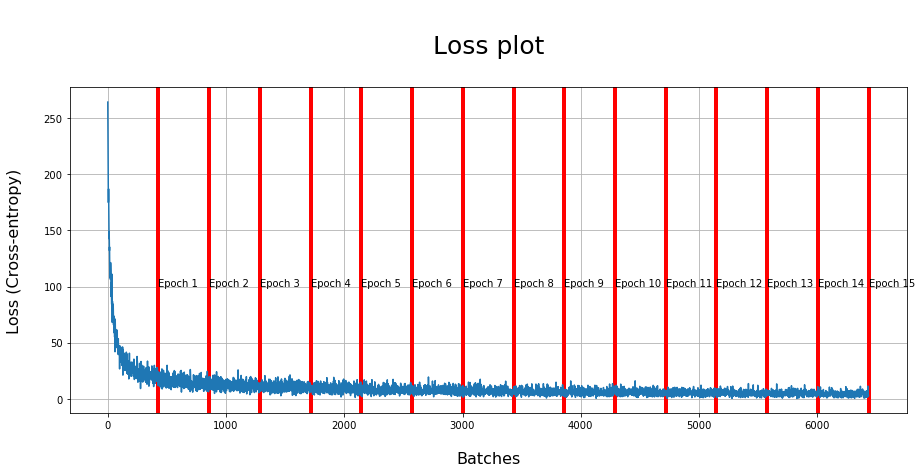

In [29]:
plt.figure(figsize=(training_epochs,6))
plt.title("\nLoss plot\n",fontsize=25)
plt.xlabel("\nBatches",fontsize=16)
plt.ylabel("Loss (Cross-entropy)\n",fontsize=16)
for i in range(len(log_epoch)):
    plt.axvline(x=log_epoch[i],lw=4,color='red')
    plt.text(x=log_epoch[i],y=100,s="Epoch {}".format(epoch_count[i]),fontsize=10)
plt.plot(loss_batch)
plt.grid(True)
plt.show()

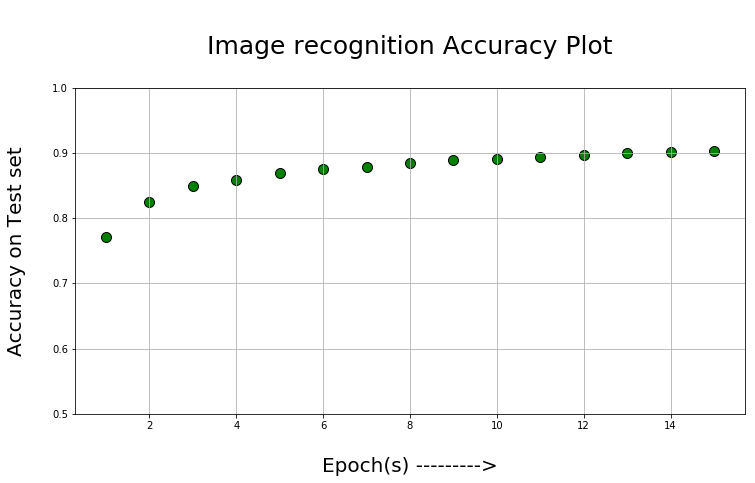

In [30]:
plt.figure(figsize=(12,6))
plt.title("\nImage recognition Accuracy Plot\n",fontsize=25)
plt.xlabel("\nEpoch(s) --------->",fontsize=20)
plt.ylabel("Accuracy on Test set\n",fontsize=20)
plt.ylim((0.5,1.0))
plt.scatter(epoch_count,acc,edgecolors='black',color='green',s=100)
plt.grid(True)   

## But what, exactly, does the output look like?

** How does the prediction vector look like?**

In [31]:
# Shape of the prediction vector
pred.shape

(10000,)

In [32]:
# Print only first 10 elements
pred[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True, False,  True], dtype=bool)

In [33]:
# Shape of the output tensor
op.shape

(10000, 10)

** It looks like 5th prediction is True, so we examine it in detail **

In [34]:
# 5th element of the output tensor
op[4]

array([ -91.22696686, -387.13345337,  -15.35714626,  -39.12060165,
        178.01049805, -126.5477829 , -109.08097076,   65.19672394,
        -76.81983185,   56.4893837 ], dtype=float32)

** So, op[4] is just an array of numbers, we need to apply softmax over it to turn these numbers into probabilities **

In [35]:
# Softmax on the 5th element of the output tensor
with tf.Session() as se:
    op5 = se.run(tf.nn.softmax(op[4]))
print(op5)

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]


** It looks like the probability is almost 1 for the 5th element of after softmax i.e. the probability vector looks like [0 0 0 0 1 0 0 0 0 0]. With 1-hot encoding enabled, this denotes a number 4 for the predicted output. Let's see the actual labeled image**

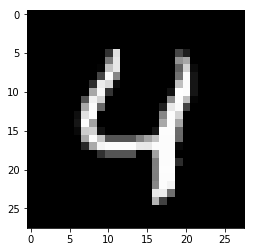

In [36]:
plt.imshow(mnist.test.images[4].reshape(28,28),cmap='gist_gray')

### It's a 4! 
** That's how the neural network calculates the probability of each test data, based on the weights and bias terms, which have been trained by the training process i.e. gradient descent with the goal of minimizing a particular loss function (cross-entropy), and assigns a label to them. **